1. Baseline Performance
* Download Data

In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-09-07 12:19:47--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 108.177.97.207, 108.177.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  21.8MB/s    in 3.0s    

2023-09-07 12:19:51 (21.8 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



* Extract Archieve
* Assign Training and validation set directories

In [3]:
import os
import zipfile
#1. Extract Archieve
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()
#_-----------------------------------------------------------------
#2. Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

* Directory with cats training pictures
* Directory with dogs training pictures

In [4]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

* Directory with cats vaildation pictures
* Directory with dogs vaildation pictures

In [5]:
vaildation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

3. Build Model

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=32 ,kernel_size=(3,3),name="Layer_1",activation='relu',input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',name="Layer_2"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3,),activation='relu',name="Layer_3"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3,),activation='relu',name="Layer_4"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512,activation='relu',name="Layer_5"))
model.add(tf.keras.layers.Dense(units =1 , activation='sigmoid',name="Layer_6"))
model.compile(loss = 'binary_crossentropy',optimizer=RMSprop(learning_rate=1e-4),metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Conv2D)            (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 Layer_2 (Conv2D)            (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 Layer_3 (Conv2D)            (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

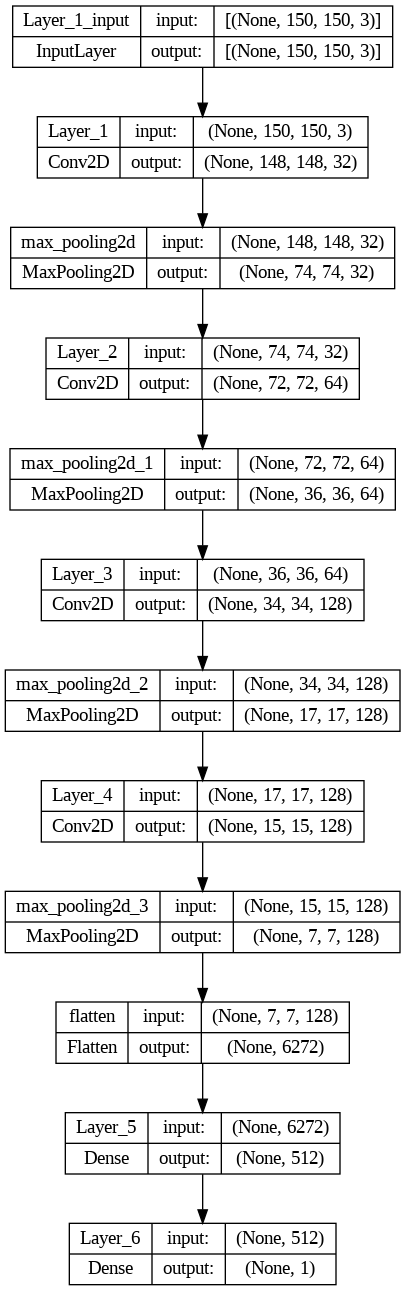

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes =True, show_layer_names = True)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

* **Flow training images in batches of 20 using train_datagen generator**
1. Train_dir --> This is the source directory for training images
2. Target_size --> All images will be resized to 150x150
3. batch_size --> Since we use binary_crossentropy loss, we need binary labels


In [10]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


*  Flow validation images in batches of 20 using test_datagen generator

In [11]:
vaildation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


5. Training Model
* Step_per_epoch = 100 --> batch_size * # of epochs --> 2000 Images
* validation_steps = 50 --> batch_szie * # of epochs --> 1000 images

In Keras, the term `"verbose"` refers to a parameter that controls the amount of information displayed during the training process.

In [12]:
EPOCHS = 20 # Detect Constant Number Of Epoches
history = model.fit(train_generator,steps_per_epoch=100,epochs=EPOCHS ,validation_data= vaildation_generator , validation_steps=50,verbose=2)

Epoch 1/20
100/100 - 133s - loss: 0.6900 - accuracy: 0.5170 - val_loss: 0.6852 - val_accuracy: 0.5560 - 133s/epoch - 1s/step
Epoch 2/20
100/100 - 133s - loss: 0.6765 - accuracy: 0.5665 - val_loss: 0.6600 - val_accuracy: 0.5780 - 133s/epoch - 1s/step
Epoch 3/20
100/100 - 138s - loss: 0.6416 - accuracy: 0.6385 - val_loss: 0.6386 - val_accuracy: 0.5940 - 138s/epoch - 1s/step
Epoch 4/20
100/100 - 175s - loss: 0.6045 - accuracy: 0.6775 - val_loss: 0.5903 - val_accuracy: 0.6810 - 175s/epoch - 2s/step
Epoch 5/20
100/100 - 150s - loss: 0.5702 - accuracy: 0.6950 - val_loss: 0.5966 - val_accuracy: 0.6590 - 150s/epoch - 1s/step
Epoch 6/20
100/100 - 155s - loss: 0.5482 - accuracy: 0.7225 - val_loss: 0.5902 - val_accuracy: 0.6880 - 155s/epoch - 2s/step
Epoch 7/20
100/100 - 122s - loss: 0.5297 - accuracy: 0.7335 - val_loss: 0.6153 - val_accuracy: 0.6730 - 122s/epoch - 1s/step
Epoch 8/20
100/100 - 120s - loss: 0.5145 - accuracy: 0.7405 - val_loss: 0.5533 - val_accuracy: 0.7020 - 120s/epoch - 1s/step


5. Plot Model by using matplotlib

1. You will then visualize the loss and accuracy with respect to the training and validation set.
2. You will again use a convenience function so it can be reused later.
3. This function accepts a History object which contains the results of the fit() method you ran above.



* `'''Plots the training and validation loss and accuracy from a history object'''`


In [13]:
import matplotlib.pyplot as plt
#create function to make visualization for data
def plot_loss_acc(history):
  plt.style.use('ggplot')
  acc= history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs,acc,'bo',alpha = 0.7 , color = 'green' ,label ='Training Accuracy')
  plt.plot(epochs,val_accuracy,'b',alpha = 0.7 , color = 'red' , label ='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs,loss,'bo',alpha = 0.7,color = 'blue',label = 'Training Loss')
  plt.plot(epochs,val_loss,'b',alpha = 0.7,color = 'red' ,label = 'Validation Loss')
  plt.title('Training & Validation Loss')
  plt.legend()
  plt.show()

* **Plot training results**


<ipython-input-13-0f67fa52b116>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,acc,'bo',alpha = 0.7 , color = 'green' ,label ='Training Accuracy')
<ipython-input-13-0f67fa52b116>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,val_accuracy,'b',alpha = 0.7 , color = 'red' , label ='Validation Accuracy')
<ipython-input-13-0f67fa52b116>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,loss,'bo',alpha = 0.7,color = 'blue',label = 'Training Loss')
<ipython-input-13-0f67fa52b116>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.

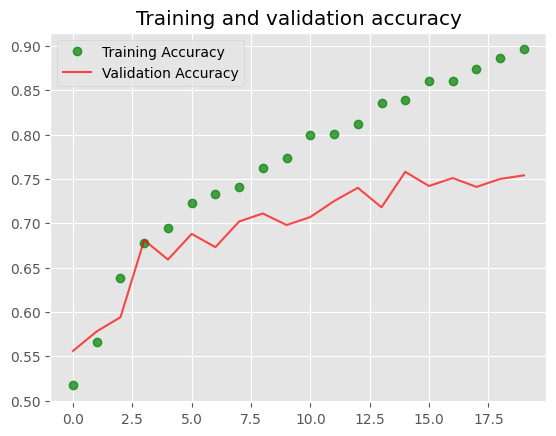

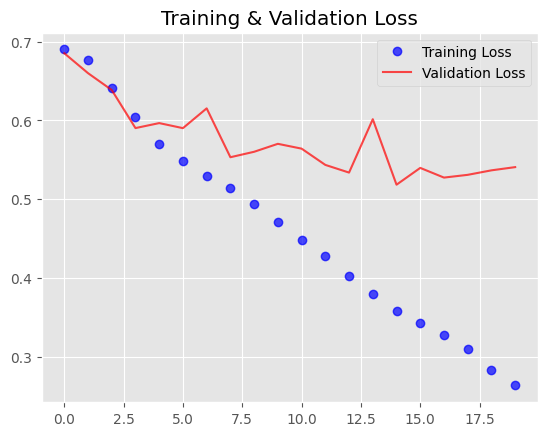

In [14]:
plot_loss_acc(history)

* **Data augmentation**
* One simple method to avoid overfitting is to augment the images a bit.
* If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc.
* Things like the distance between the eyes and ears will always be quite similar too.

* **What if you tweak with the images a bit -- rotate the image, squash it, etc.**
* That's what image augementation is all about. And there's an API that makes it easy!

Take a look at the [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) which you have been using to rescale the image. There are other properties on it that you can use to augment the image.

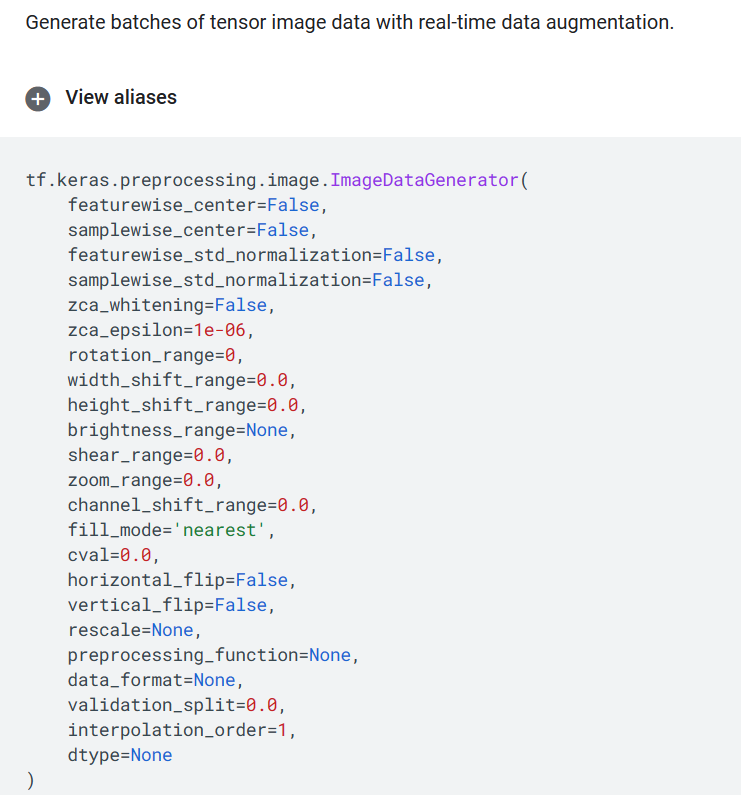

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```

* `rotation_range` is a value in degrees (0–180) within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally.
* This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


In [16]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

* Rescale By using ImageDataGenerator

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

* Flow training images in batches of 20 using train_datagen generator
1. `train_dir` -->  This is the source directory for training images
2. `target_size=(150, 150)` -->  All images will be resized to 150x150
3. Since we use binary_crossentropy loss, we need binary labels

In [18]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


* Flow validation images in batches of 20 using test_datagen generator


In [19]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


# Train the new model


In [20]:
history_with_aug = model.fit(train_generator,steps_per_epoch=100,epochs=EPOCHS,validation_data=validation_generator,validation_steps=50,verbose=2)

Epoch 1/20
100/100 - 139s - loss: 0.6118 - accuracy: 0.6815 - val_loss: 0.4921 - val_accuracy: 0.7640 - 139s/epoch - 1s/step
Epoch 2/20
100/100 - 131s - loss: 0.5722 - accuracy: 0.6945 - val_loss: 0.5254 - val_accuracy: 0.7460 - 131s/epoch - 1s/step
Epoch 3/20
100/100 - 137s - loss: 0.5592 - accuracy: 0.7050 - val_loss: 0.5040 - val_accuracy: 0.7510 - 137s/epoch - 1s/step
Epoch 4/20
100/100 - 130s - loss: 0.5645 - accuracy: 0.7090 - val_loss: 0.4907 - val_accuracy: 0.7580 - 130s/epoch - 1s/step
Epoch 5/20
100/100 - 136s - loss: 0.5388 - accuracy: 0.7195 - val_loss: 0.4944 - val_accuracy: 0.7500 - 136s/epoch - 1s/step
Epoch 6/20
100/100 - 134s - loss: 0.5417 - accuracy: 0.7245 - val_loss: 0.5525 - val_accuracy: 0.7080 - 134s/epoch - 1s/step
Epoch 7/20
100/100 - 128s - loss: 0.5457 - accuracy: 0.7170 - val_loss: 0.4649 - val_accuracy: 0.7740 - 128s/epoch - 1s/step
Epoch 8/20
100/100 - 135s - loss: 0.5405 - accuracy: 0.7190 - val_loss: 0.5088 - val_accuracy: 0.7430 - 135s/epoch - 1s/step


# Plot the results of training with data augmentation

<ipython-input-13-0f67fa52b116>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,acc,'bo',alpha = 0.7 , color = 'green' ,label ='Training Accuracy')
<ipython-input-13-0f67fa52b116>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,val_accuracy,'b',alpha = 0.7 , color = 'red' , label ='Validation Accuracy')
<ipython-input-13-0f67fa52b116>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,loss,'bo',alpha = 0.7,color = 'blue',label = 'Training Loss')
<ipython-input-13-0f67fa52b116>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.

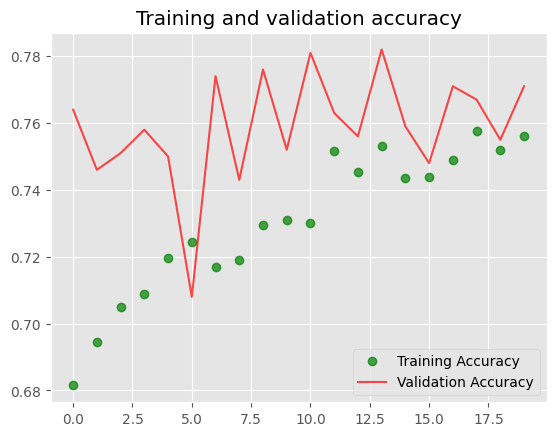

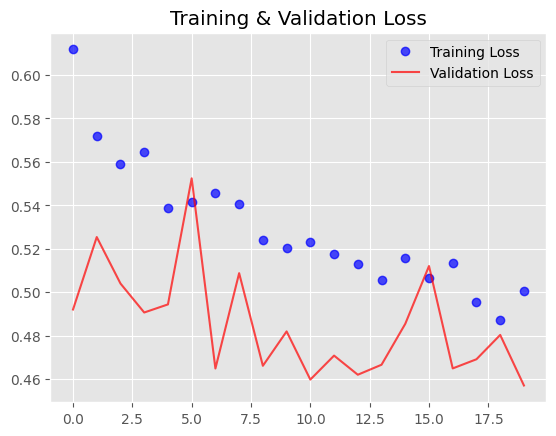

In [21]:
plot_loss_acc(history_with_aug)